# **Wine Quality Prediction using Support Vector Machine**

# **Get Understanding about Data set**

1.   Fixed Acidity
2.   Volatile Acidity
3.   Citric Acid
4.   Residual Sugar
5.   Chlorides
6.   Free Sulfur Dioxide
7.   Total Sulfur Dioxide
8.   Density
9.   pH
10.  Sulphates
11.  Alcohol
12.  Quality



# **Step1 : Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import seaborn as sns


# **Step2 : Import CSV as DataFrame**

In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/WhiteWineQuality.csv', sep=';')


<Axes: xlabel='quality', ylabel='count'>

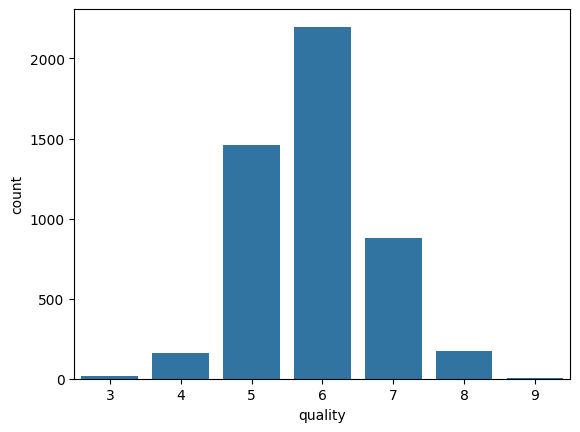

In [4]:
sns.countplot(x='quality',data=df)

# **Step 3: Preprocessing the dataset**

# **Get the First Five Rows of DataFrame**

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# **Get Information of DataFrame**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


# **Get the Summary Statistics**

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# **Get Column Names**

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# **Get Shape of DataFrame**

In [9]:
df.shape

(4898, 12)

# **Get Unique Values (Class or Label) in y variable**

In [10]:
df['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [11]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


# **Define y(Dependent variable) and X(independent variable)**

In [12]:
y=df['quality']

In [13]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

# **Get X Variables Standardized**
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn, they might behave badly if the individual features do not more or less look like standard normally distributed data. This is done to overcome the problem of different ranges of values of different columns

Next approach is go for MinMax Scaler

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
model = StandardScaler()

In [16]:
X = model.fit_transform(X)

In [17]:
X

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

# **Get Train Test Split**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=2529)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

# **Get Model Train**

In [21]:
from sklearn.svm import SVC

In [22]:
svc = SVC()

In [23]:
svc.fit(X_train, y_train)

SVC()

# **Get Model Prediction**

In [24]:
y_pred = svc.predict(X_test)

In [25]:
y_pred.shape

(1470,)

In [26]:
y_pred

array([5, 7, 5, ..., 5, 5, 5])

# **Get Model Evaluation**

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   1   5   0   0   0]
 [  0   2  25  22   0   0   0]
 [  0   3 273 160   1   0   0]
 [  0   0 122 515  23   0   0]
 [  0   0   6 191  67   0   0]
 [  0   0   0  39  14   0   0]
 [  0   0   0   0   1   0   0]]


In [29]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.40      0.04      0.07        49
           5       0.64      0.62      0.63       437
           6       0.55      0.78      0.65       660
           7       0.63      0.25      0.36       264
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1470
   macro avg       0.32      0.24      0.25      1470
weighted avg       0.57      0.58      0.55      1470



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Get Model Re-Run with Two Class Created for Wine Quality**
Wine Quality 3,4,5 labelled as 0

Wine Quality 6,7,8,9 labelled as 1

In [30]:
y = df['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

In [31]:
y.value_counts()

quality
1    3258
0    1640
Name: count, dtype: int64

# **Get Train Test Split Again**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=2529)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

# **Get Model Train**

In [35]:
from sklearn.svm import SVC

In [36]:
svc= SVC()

In [37]:
svc.fit(X_train, y_train)

SVC()

# **Get Model Prediction**

In [38]:
y_pred = svc.predict(X_test)

In [39]:
y_pred.shape

(1470,)

In [40]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

# **Get Model Evaluation**

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
print(confusion_matrix(y_test, y_pred))

[[289 203]
 [124 854]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       492
           1       0.81      0.87      0.84       978

    accuracy                           0.78      1470
   macro avg       0.75      0.73      0.74      1470
weighted avg       0.77      0.78      0.77      1470



# **Get Future Predictions**

**Let's select a random sample from existing dataset as new value**

Steps to follow


1.  Extract a random row using sample function  
2.  Separate  and y
3.  Standardize X
4.  Predict



In [45]:
df_new = df.sample(1)

In [46]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1798,6.8,0.23,0.29,15.4,0.073,56.0,173.0,0.9984,3.06,0.41,8.7,6


In [47]:
df_new.shape

(1, 12)

In [48]:
X_new = df_new.drop(['quality'], axis=1)

In [49]:
X_new = model.fit_transform(X_new)

In [50]:
y_pred_new = svc.predict(X_new)

In [51]:
y_pred_new

array([1])